My filter field code doesn't work in 3D. 

In [16]:
def filter_field(field,frac=0.5):
    field.require_coeff_space()
    dom = field.domain                                                                                                                                                      
    local_slice = dom.dist.coeff_layout.slices(scales=dom.dealias)                                                                                                          
    coeff = []                                                                                                                                                              
    #for i in range(dom.dim)[::-1]:
    for i in range(dom.dim):
        print(i,dom.global_coeff_shape[i])
        coeff.append(np.linspace(0,1,dom.global_coeff_shape[i],endpoint=False))                                                                                             
    cc = np.meshgrid(*coeff)
    field_filter = np.zeros(dom.local_coeff_shape,dtype='bool')                                                                                                             

    return cc,field_filter
    for i in range(dom.dim):                                                                                                                                                
        field_filter = field_filter | (cc[i][local_slice] > frac)                                                                                                           
    field['c'][field_filter] = 0j

In [2]:
%matplotlib inline

In [3]:
import dedalus.public as de
import numpy as np
import matplotlib.pyplot as plt

In [4]:
r = de.Chebyshev('r',32)
z = de.Fourier('z',32)
theta =de.Fourier('theta',32)

dom = de.Domain([z,theta,r],grid_dtype='float')

In [5]:
temp = dom.new_field()

In [6]:
temp.domain.local_coeff_shape

array([16, 31, 32])

In [7]:
temp.domain.global_coeff_shape

array([16, 31, 32])

In [30]:
coeff = []
for i in range(dom.dim):
    print(i,dom.global_coeff_shape[i])
    coeff.append(np.linspace(0,1,dom.global_coeff_shape[i],endpoint=False))                                                                                             
cc = np.meshgrid(*coeff)

0 16
1 31
2 32


In [31]:
cc[0].shape

(31, 16, 32)

In [22]:
cc[2].shape

(31, 32, 16)

In [11]:
ff.shape

(16, 31, 32)

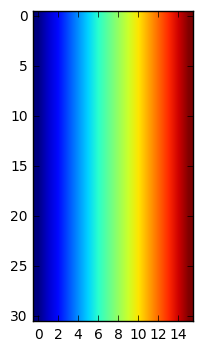

In [19]:
plt.imshow(cc[2][:,0,:])